In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulación 2 riesgos simultáneos

In [9]:
from scipy.stats import geom

# Curvas de supervivencia
S_I = geom.sf(range(49), .1)
S_C  =geom.sf(range(50), .1)

array([1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
       6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
       3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
       2.44140625e-04, 1.22070313e-04, 6.10351563e-05, 3.05175781e-05,
       1.52587891e-05, 7.62939453e-06, 3.81469727e-06, 1.90734863e-06,
       9.53674316e-07, 4.76837158e-07, 2.38418579e-07, 1.19209290e-07,
       5.96046448e-08, 2.98023224e-08, 1.49011612e-08, 7.45058060e-09,
       3.72529030e-09, 1.86264515e-09, 9.31322575e-10, 4.65661287e-10,
       2.32830644e-10, 1.16415322e-10, 5.82076609e-11, 2.91038305e-11,
       1.45519152e-11, 7.27595761e-12, 3.63797881e-12, 1.81898940e-12,
       9.09494702e-13, 4.54747351e-13, 2.27373675e-13, 1.13686838e-13,
       5.68434189e-14, 2.84217094e-14, 1.42108547e-14, 7.10542736e-15,
       3.55271368e-15])

In [49]:
N = 100000
# 0 -> sigo
# 1 -> cancelo
# 2 -> impago

sucesos = np.random.choice([0, 1, 2],N, p = [0.9, 0.03, 0.07])
pd.DataFrame(sucesos).value_counts()

0    89914
2     7084
1     3002
dtype: int64

In [101]:
tiempos = geom.rvs(p = .05, size = N)

In [108]:
the_data = pd.DataFrame({'d': tiempos, 'evento': sucesos})

probe = the_data \
    .groupby(['d', 'evento']) \
    .agg({'evento': 'count'}) \
    .rename(columns={'evento': 'n'}) \
    .reset_index() \
    .pivot(index='d', columns='evento', values='n') \
    .sort_values(['d']) \
    .fillna(0)

probe.loc[:, [0,1,2]].sum(0, skipna=True)

evento
0    89914.0
1     3002.0
2     7084.0
dtype: float64

In [110]:
the_data

,d,evento
0,17,0
1,12,0
2,12,0
3,1,0
4,10,0
...,...,...
99995,18,0
99996,3,0
99997,41,0
99998,4,0


In [103]:
probe

evento,0,1,2
d,,,
1,4565.0,154.0,343.0
2,4172.0,134.0,333.0
3,4057.0,135.0,339.0
4,3884.0,130.0,296.0
5,3617.0,133.0,285.0
...,...,...,...
207,1.0,0.0,0.0
214,1.0,0.0,0.0
217,0.0,0.0,1.0


In [109]:
dataset_1 = pd.DataFrame(probe.loc[:, 1])
dataset_1['Censored'] = probe.loc[:, 0] + probe.loc[:, 2]
dataset_1

,1,Censored
d,,
1,154.0,4908.0
2,134.0,4505.0
3,135.0,4396.0
4,130.0,4180.0
5,133.0,3902.0
...,...,...
207,0.0,1.0
214,0.0,1.0
217,0.0,1.0


In [104]:
dataset_2 = pd.DataFrame(probe.loc[:, 2])
dataset_2['Censored'] = probe.loc[:, 0] + probe.loc[:, 1]
dataset_2

,2,Censored
d,,
1,343.0,4719.0
2,333.0,4306.0
3,339.0,4192.0
4,296.0,4014.0
5,285.0,3750.0
...,...,...
207,0.0,1.0
214,0.0,1.0
217,1.0,0.0


In [113]:
the_data1 = the_data.copy()
the_data1.loc[:, "evento"] = np.where(the_data1.loc[:, "evento"] == 2, 0, the_data1.loc[:, "evento"])
the_data1

,d,evento
0,17,0
1,12,0
2,12,0
3,1,0
4,10,0
...,...,...
99995,18,0
99996,3,0
99997,41,0
99998,4,0


In [123]:
from lifelines import KaplanMeierFitter

the_data1 = the_data.copy()
the_data1.loc[:, "evento"] = np.where(the_data1.loc[:, "evento"] == 2, 0, the_data1.loc[:, "evento"])
the_data1.loc[:, "evento"] = np.where(the_data1.loc[:, "evento"] != 0, 1, the_data1.loc[:, "evento"])
km1 = KaplanMeierFitter()
km1.fit(durations = the_data1['d'], event_observed = the_data1['evento'])

the_data2 = the_data.copy()
the_data2.loc[:, "evento"] = np.where(the_data2.loc[:, "evento"] == 1, 0, the_data2.loc[:, "evento"])
the_data2.loc[:, "evento"] = np.where(the_data2.loc[:, "evento"] != 0, 1, the_data2.loc[:, "evento"])
km2 = KaplanMeierFitter()
km2.fit(durations = the_data2['d'], event_observed = the_data2['evento'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 100000 total observations, 92916 right-censored observations>

<Axes: xlabel='timeline'>

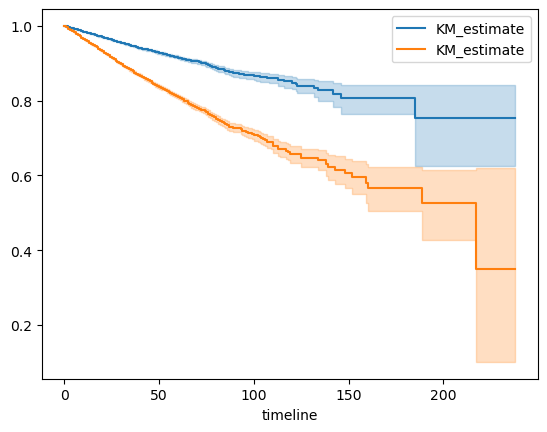

In [124]:
km1.plot_survival_function()
km2.plot_survival_function()

In [119]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100000,100000
1.0,5062,154,4908,0,100000
2.0,4639,134,4505,0,94938
3.0,4531,135,4396,0,90299
4.0,4310,130,4180,0,85768
...,...,...,...,...,...
207.0,1,0,1,0,5
214.0,1,0,1,0,4
217.0,1,0,1,0,3


In [129]:
km_1_2 = KaplanMeierFitter()
km_1_2.fit(durations = the_data['d'], event_observed = the_data['evento'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 100000 total observations, 89914 right-censored observations>

<Axes: xlabel='timeline'>

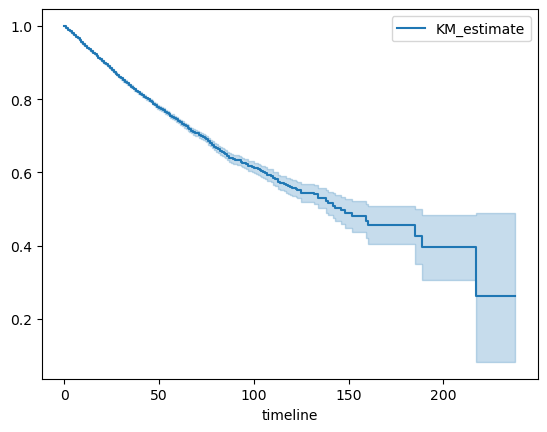

In [130]:
km_1_2.plot_survival_function()

In [131]:
km_1_2.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100000,100000
1.0,5062,497,4565,0,100000
2.0,4639,467,4172,0,94938
3.0,4531,474,4057,0,90299
4.0,4310,426,3884,0,85768
...,...,...,...,...,...
207.0,1,0,1,0,5
214.0,1,0,1,0,4
217.0,1,1,0,0,3


In [137]:
res = pd.DataFrame({'sf_1': km1.survival_function_.KM_estimate,
                    'sf_2': km2.survival_function_.KM_estimate,
                    'sf_1 x sf_2': km1.survival_function_.KM_estimate * km2.survival_function_.KM_estimate,
                    'sf_1_2': km_1_2.survival_function_.KM_estimate})
res

,sf_1,sf_2,sf_1 x sf_2,sf_1_2
timeline,,,,
0.0,1.000000,1.000000,1.000000,1.000000
1.0,0.998460,0.996570,0.995035,0.995030
2.0,0.997051,0.993074,0.990146,0.990135
3.0,0.995560,0.989346,0.984954,0.984938
4.0,0.994051,0.985932,0.980067,0.980046
...,...,...,...,...
207.0,0.753253,0.525495,0.395831,0.395572
214.0,0.753253,0.525495,0.395831,0.395572
217.0,0.753253,0.350330,0.263887,0.263714


<Axes: xlabel='timeline'>

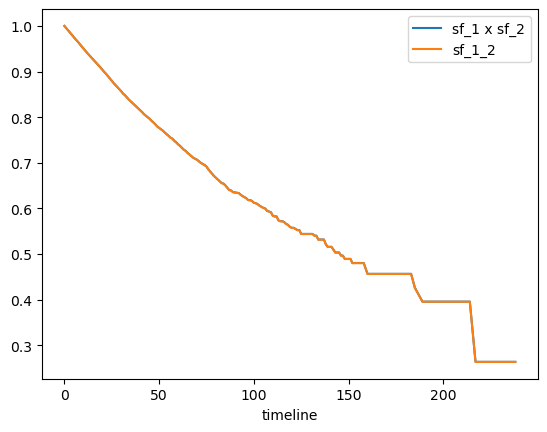

In [139]:
res.loc[:,['sf_1 x sf_2', 'sf_1_2']].plot()